In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
# relevent package's

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

In [16]:
# 1.a Exporting 'ETH-USD' ($) data for 1 year, 03 March 2022 - 03 March 2023

initial_data = yf.download("ETH-USD", start="2022-03-03", end="2023-03-03")

[*********************100%***********************]  1 of 1 completed


In [17]:
# Returns of the head of the ETH Price ($) from first.

initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-03,2950.156738,2964.673340,2797.319336,2834.468994,2834.468994,13091199728
2022-03-04,2834.987305,2835.176270,2587.748291,2617.156006,2617.156006,14496939024
2022-03-05,2618.473633,2679.102539,2596.989990,2664.831055,2664.831055,8072368396
2022-03-06,2664.943604,2673.637207,2555.037354,2555.037354,2555.037354,8872976607
2022-03-07,2555.297607,2639.943115,2455.593750,2497.771240,2497.771240,14594098731


In [18]:
#Returns of the tail of the ETH Price ($) from last.
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-26,1594.761108,1645.273438,1590.393066,1640.817139,1640.817139,5727967432
2023-02-27,1640.763672,1662.575684,1615.387939,1634.326416,1634.326416,7239824677
2023-02-28,1634.502441,1644.435791,1602.428101,1605.895142,1605.895142,6323676957
2023-03-01,1606.040405,1663.433716,1601.548584,1663.433716,1663.433716,7701847224
2023-03-02,1663.549072,1672.051147,1622.599976,1647.319336,1647.319336,7080950926


In [19]:
initial_data['Adj Close'].head()

Date
2022-03-03    2834.468994
2022-03-04    2617.156006
2022-03-05    2664.831055
2022-03-06    2555.037354
2022-03-07    2497.771240
Name: Adj Close, dtype: float64

In [20]:
initial_data['Adj Close'].head()

Date
2022-03-03    2834.468994
2022-03-04    2617.156006
2022-03-05    2664.831055
2022-03-06    2555.037354
2022-03-07    2497.771240
Name: Adj Close, dtype: float64

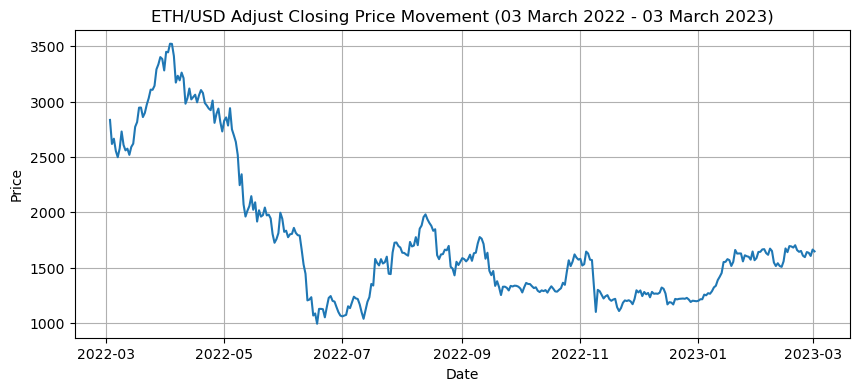

In [25]:
# clossing price movement of ETH-USD $

plt.figure(figsize=(10,4))
plt.plot(initial_data.index, initial_data['Close'])
plt.title('ETH/USD Adjust Closing Price Movement (03 March 2022 - 03 March 2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [26]:
initial_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,1753.632508,1796.079108,1706.441883,1749.993841,1749.993841,1.399273e+10
std,634.293202,646.281827,621.592358,631.262786,631.262786,7.246278e+09
min,993.400635,1073.052612,896.109009,993.636780,993.636780,2.399675e+09
25%,1283.188110,1303.075195,1260.663696,1283.200928,1283.200928,8.557248e+09
50%,1576.543579,1626.198242,1541.672119,1576.833496,1576.833496,1.336928e+10
75%,1880.899170,1957.552979,1823.532227,1878.139404,1878.139404,1.812083e+10
max,3522.364990,3573.960205,3442.000244,3522.833496,3522.833496,4.574340e+10


In [27]:
# 1.b Annualised Volatility of ETH-USD $

log_return = np.log(initial_data['Adj Close']/initial_data['Adj Close'].shift(1))

In [28]:
vol = np.sqrt(365) * log_return [-183: -1].std()
print('The Annualised Volatility is:', round(vol*100,2),'%')

The Annualised Volatility is: 71.12 %


In [38]:
#2 CRR BINOMINAL TREE

# S = 1788.82      (Spot Asset Price) on 03/03/2023
# K = 1890.23       Strike Price
# T = 0.25        Time of Maturity 
# r = 0.048       Risk Free Rate of 3 month U.S. Treasury Bill 
# vol = 0.7112    Annualized Volatility (71.12%) 'Volatility of underlying asset'
# N = 5           Number of Periods
# payoff = "put"  Call or Put

In [39]:
S0 = 1788.82
K = 1890.23
T = 0.25
r = 0.04856
vol = 0.7112
N = 5
payoff = "put"

In [40]:
dT = float(T) / N               # Delta t
u = np.exp(vol * np.sqrt(dT))   # up factor
d = 1.0 / u                     # down factor 

In [41]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [42]:
S

array([[1788.82      , 2097.16270675, 2458.65510144, 2882.45870881,
        3379.31424506, 3961.8138265 ],
       [   0.        , 1525.81246181, 1788.82      , 2097.16270675,
        2458.65510144, 2882.45870881],
       [   0.        ,    0.        , 1301.47452993, 1525.81246181,
        1788.82      , 2097.16270675],
       [   0.        ,    0.        ,    0.        , 1110.12066977,
        1301.47452993, 1525.81246181],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         946.90128243, 1110.12066977],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  807.67979833]])

In [43]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4679372635265371

In [44]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  364.41753819],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  780.10933023],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1082.55020167]])

In [45]:
# European Put Option 

for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 308.8489927 ,  163.66006601,   54.4909526 ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  437.95050797,  260.419606  ,  102.66348991,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  596.08592034,  400.35241317,
         193.42279146,    0.        ],
       [   0.        ,    0.        ,    0.        ,  770.95262383,
         584.17155875,  364.41753819],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         938.74480625,  780.10933023],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1082.55020167]])

In [46]:
print('The European Put Option for ETH/USD is:', str(V[0,0]))

The European Put Option for ETH/USD is: 308.84899269592614


In [47]:
# MONTE CARLO SIMULATION.

def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [48]:
T = 0.25 
r = 0.048
sigma = 0.7112
S0 = 1788.82
K = 1890.23

In [49]:
S = mcs_simulation_np(10000)

In [50]:
S = np.transpose(S)
S

array([[1788.82      , 1804.09114971, 1799.34604104, ..., 1233.14167501,
        1233.90900782, 1232.24506381],
       [1788.82      , 1788.22832737, 1790.463604  , ..., 2564.68658572,
        2559.42079579, 2556.00423595],
       [1788.82      , 1798.57161223, 1793.02158763, ..., 1633.65741584,
        1634.68392004, 1635.86366809],
       ...,
       [1788.82      , 1786.83781026, 1784.24658289, ..., 1551.86910202,
        1552.67184282, 1548.36809509],
       [1788.82      , 1790.51859415, 1783.26704994, ..., 2854.83268805,
        2849.40457339, 2855.02532007],
       [1788.82      , 1787.8519007 , 1787.3650705 , ..., 2270.60809562,
        2268.81390941, 2269.03278909]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

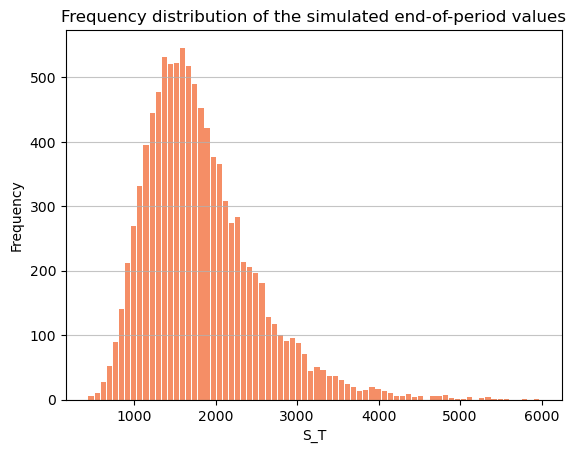

In [52]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#f15e25',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [54]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('Monte Carlo: Binary put:' + ' $', str(p.round(4)))

Monte Carlo: Binary put: $ 302.9586


In [ ]:
# GREEKS

In [55]:
# DELTA- Delta is the first derivative of the value V of the option with respect to the underlying instrument's price
# (unit $)

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [69]:
delta(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

-0.23993387334553046

In [104]:
S = np.linspace(1,1900,51)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i],1890.0, 1, 0.0138, 0.00, 0.4328 , 'put')

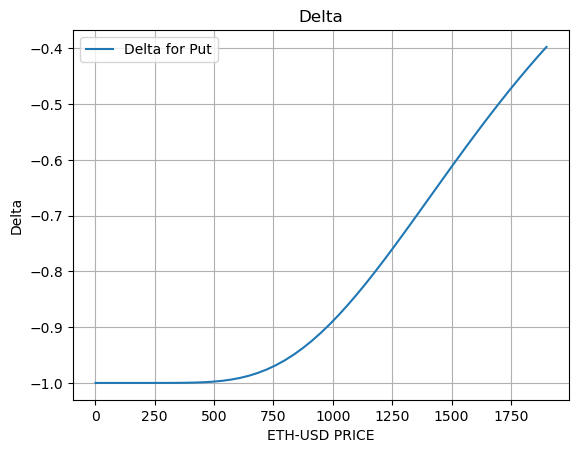

In [105]:
fig = plt.figure()
plt.plot(S, Delta_Put)
plt.grid()
plt.xlabel('ETH-USD PRICE')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [106]:
# 3d surface plot of delta

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [107]:
S = np.linspace(1,1900, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1890.0, 1, 0.0138, 0.00, 0.4328, 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\532484932.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


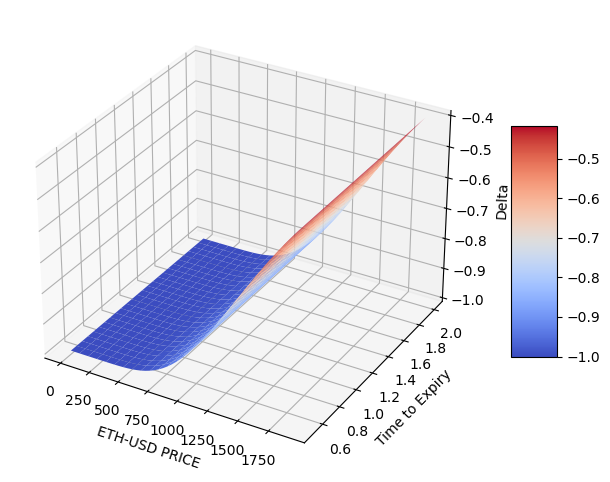

In [108]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-USD PRICE')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [109]:
d = delta(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase ', d.round(4),'$' '.')

The value of Delta is -0.2399 . If the stock price increase 1 dollar, then the value of the option will increase  -0.2399 $.


In [110]:
# GAMMA Gamma is the second derivative of the value function with respect to the underlying price.(no unit)

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [111]:
gamma(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

0.000379987189240851

In [122]:
S = np.linspace(1,1900, 51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],1890.0, 1, 0.0138, 0.00, 0.4328, 'put')

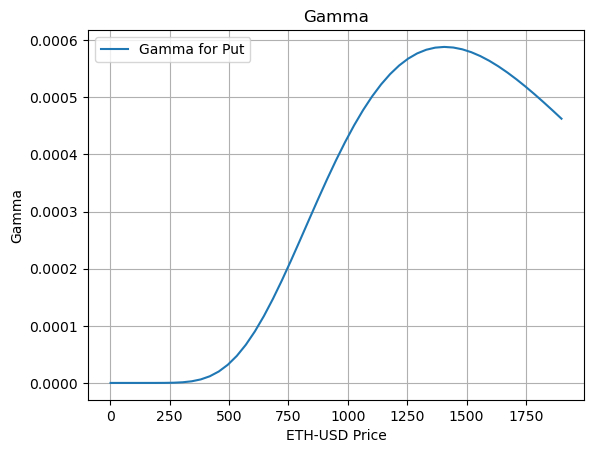

In [123]:
fig = plt.figure()
plt.plot(S, Gamma)
plt.grid()
plt.xlabel('ETH-USD Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [124]:
# 3rd surface plot of gamma

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [125]:
S = np.linspace(1,1900,51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1890.0, 1, 0.0138, 0.00, 0.4328 , 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\1624281620.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


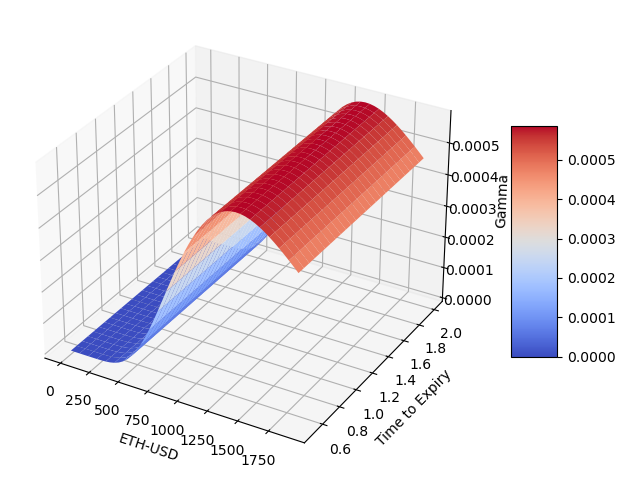

In [126]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [127]:
# speed-Speed measures the rate of change in Gamma with respect to changes in the underlying price(no unit)

def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [128]:
speed(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

-5.292536054850661e-07

In [129]:
S = np.linspace(1,1900,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],1890.0, 1, 0.0138, 0.00, 0.4328 , 'put')

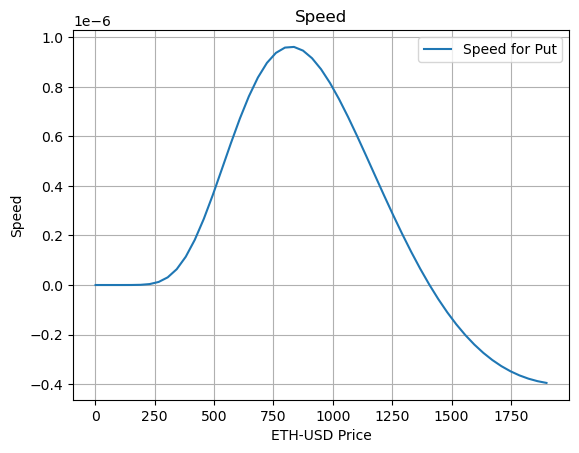

In [130]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('ETH-USD Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [131]:
# 3d surface plot of speed

def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [148]:
S = np.linspace(1,1900, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],1890.0, 1, 0.0138, 0.00, 0.4328, 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\2939004021.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


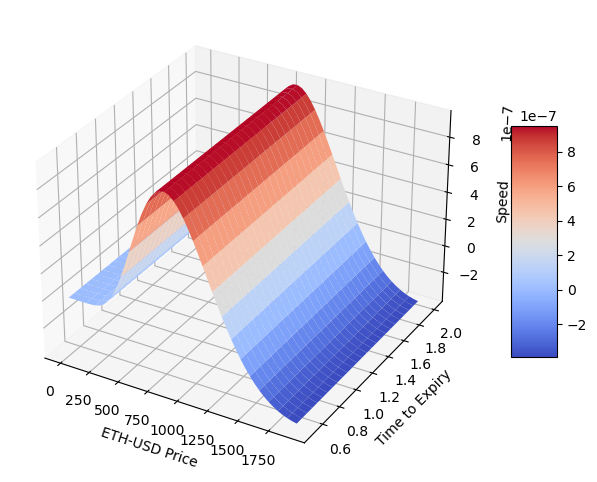

In [149]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [150]:
# theta- Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".
# unit $

def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [158]:
theta(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

-118.85362331806375

In [164]:
T = np.linspace(0.5,2,51)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(1890.0, 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

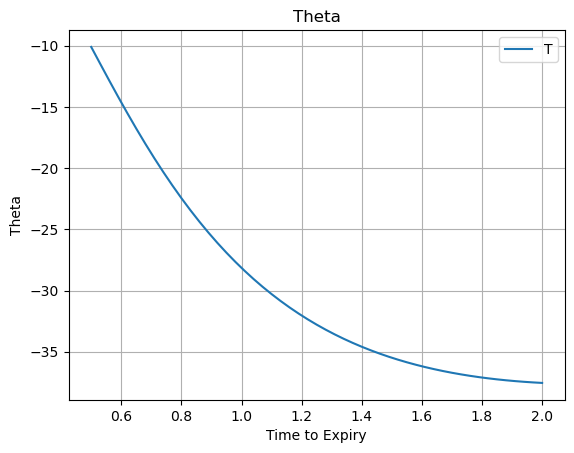

In [165]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend('Theta for Put')

In [166]:
# 3d plot of theta

def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [174]:
S = np.linspace(1, 1900, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],777.0, T[i], 0.0138, 0.00, 0.5353, 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\862506384.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


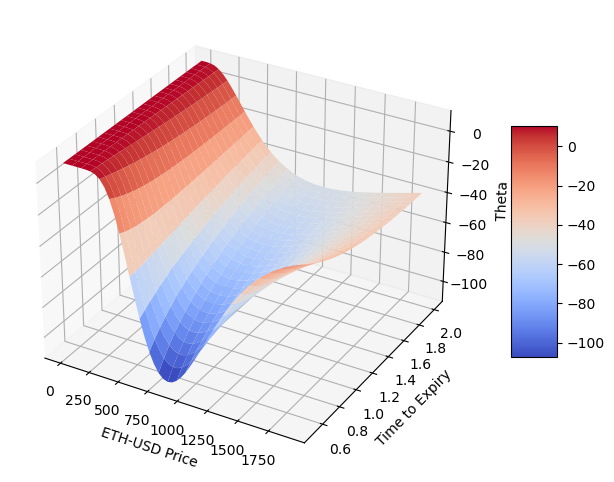

In [175]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [173]:
# RHO-Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).
# unit $

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [170]:
rho (1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

-599.5046423715258

In [176]:
r = np.linspace(0,0.1,50)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(188.82, 770.0, 1, r[i], 0.00, 0.5353, 'put')

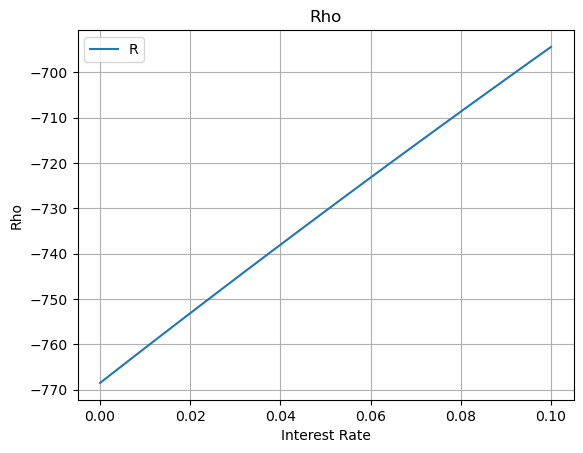

In [177]:
fig = plt.figure()
plt.plot(r, Rho_Put)
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend('Rho for Put')

In [178]:
# 3d plot of rho

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [181]:
S = np.linspace(200,1900, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 870.0, T[i], 0.0138, 0.00, 0.5353, 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\345556046.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


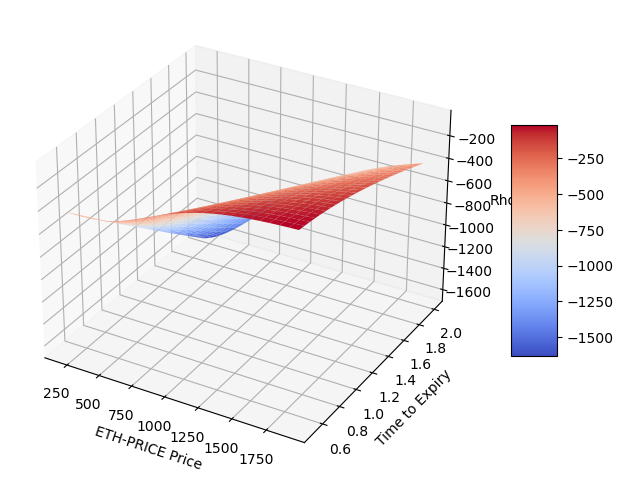

In [182]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-PRICE Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [183]:
# vega- Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.
# unit $

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [184]:
vega (1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')

587.4620489038392

In [186]:
vol = np.linspace(0.1,0.4,50)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(870.48, 770.0, 1, 0.0138, 0.00, vol[i], 'put')

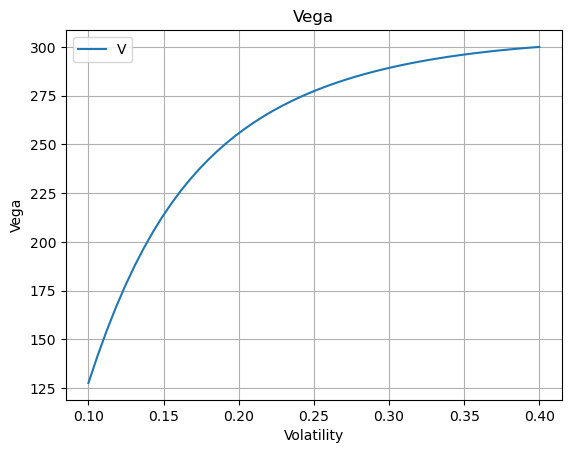

In [187]:
fig = plt.figure()
plt.plot(vol, Vega)
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend('Vega for Put')

In [188]:
# 3d plot of vega

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [189]:
S = np.linspace(200, 1900, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

C:\Users\ripom\AppData\Local\Temp\ipykernel_27168\3892940838.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


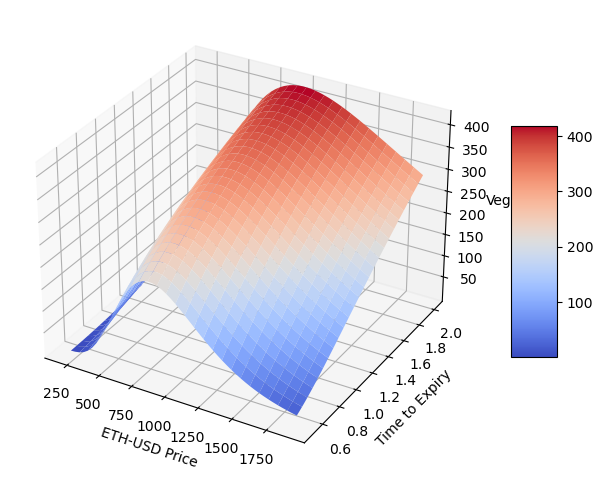

In [190]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ETH-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [192]:
v = vega(1890.0, 1550.0, 1, 0.0138, 0.00, 0.4328, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase ', v.round(4)*0.01, '$''.')

The value of Vega is 587.462 . If the volatility increases 1%, then the value of the option will increase  5.87462 $.
